Shape of Data 	 (48, 1)
original Dataset:
 <bound method NDFrame.head of             Prices
Dates             
2020-10-31   10.10
2020-11-30   10.30
2020-12-31   11.00
2021-01-31   10.90
2021-02-28   10.90
2021-03-31   10.90
2021-04-30   10.40
2021-05-31    9.84
2021-06-30   10.00
2021-07-31   10.10
2021-08-31   10.30
2021-09-30   10.20
2021-10-31   10.10
2021-11-30   11.20
2021-12-31   11.40
2022-01-31   11.50
2022-02-28   11.80
2022-03-31   11.50
2022-04-30   10.70
2022-05-31   10.70
2022-06-30   10.40
2022-07-31   10.50
2022-08-31   10.40
2022-09-30   10.80
2022-10-31   11.00
2022-11-30   11.60
2022-12-31   11.60
2023-01-31   12.10
2023-02-28   11.70
2023-03-31   12.00
2023-04-30   11.50
2023-05-31   11.20
2023-06-30   10.90
2023-07-31   11.40
2023-08-31   11.10
2023-09-30   11.50
2023-10-31   11.80
2023-11-30   12.20
2023-12-31   12.80
2024-01-31   12.60
2024-02-29   12.40
2024-03-31   12.70
2024-04-30   12.10
2024-05-31   11.40
2024-06-30   11.50
2024-07-31   11.60
2024-08-31   11

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_31756\4283292375.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('D:\Power BI thing\Forage Data sets\JPMC Data analyst\At_Gas.csv',index_col=0,parse_dates=True)


<Axes: xlabel='Dates'>

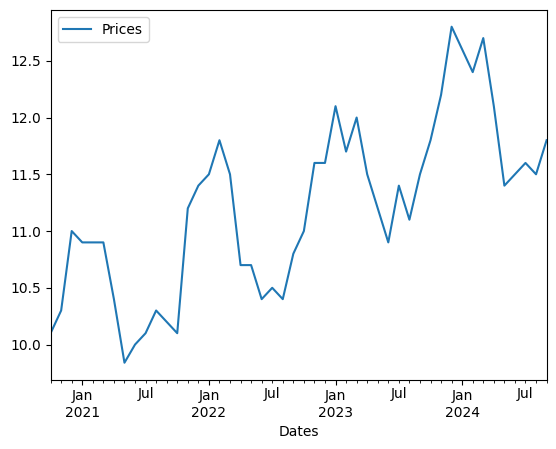

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

df = pd.read_csv('D:\Power BI thing\Forage Data sets\JPMC Data analyst\At_Gas.csv',index_col=0,parse_dates=True)
X = df.values
print('Shape of Data \t',df.shape)
print('original Dataset:\n',df.head)
print('After extraxting: \n', X)

df.plot()

1; ADF : -0.04970077226581523
2: P-value : 0.9542237323325159
3: number of Lags 10
4 Number of Observations used for ADF regression and Critical Value Calculations : 37
5: critical Values :
	 1% : -3.6209175221605827
	 5% : -2.9435394610388332
	 10% : -2.6104002410518627


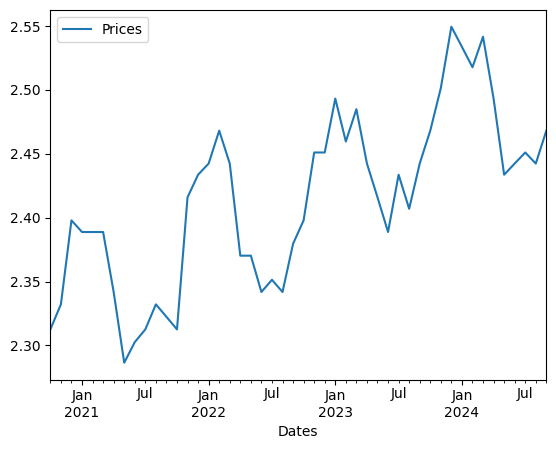

In [3]:
from statsmodels.tsa.stattools import adfuller
df = np.log(df)
df.plot()
dftest = adfuller(df['Prices'],autolag = 'AIC')

print('1; ADF :', dftest[0])
print('2: P-value :',dftest[1])
print('3: number of Lags',dftest[2])
print('4 Number of Observations used for ADF regression and Critical Value Calculations :',dftest[3])
print('5: critical Values :')

for key, val in dftest[4].items():
    print('\t',key,":",val)

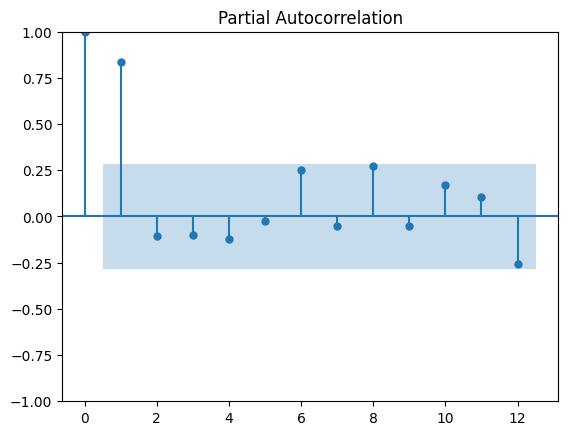

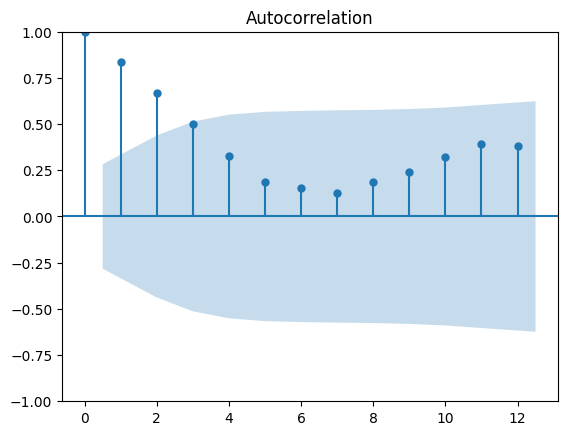

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

pacf = plot_pacf(df["Prices"],lags=12)
acf = plot_acf(df['Prices'],lags=12)

In [5]:
#df_train_diff = df_train.diff().dropna()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

#Split data into training and testing : Last 8 months
train = X[:len(X)-10]
test = X[len(X)-10:]
#model = AutoReg(train,lags=10).fit()
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -15.231
Date:                Mon, 31 Mar 2025   AIC                             38.462
Time:                        23:22:22   BIC                             44.905
Sample:                             0   HQIC                            40.734
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6904      0.412     -1.678      0.093      -1.497       0.116
ar.L2          0.2611      0.243      1.073      0.283      -0.216       0.738
ma.L1          0.8398      0.411      2.042      0.0